# Appendix: Assignment 2 Programming

## Ques 1

In [2]:
########################################################################
import sympy as sym
import math
from IPython.display import display, Math, Markdown
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

x = sym.symbols('x')

########################################################################
def f1(x):
    return x + sym.cos(x)*sym.exp(-x**2)
def f1p(x):
    return sym.diff(f1(x),x)
def f1pp(x):
    return sym.diff(f1p(x),x)

########################################################################
def f2(x):
    return (x + sym.cos(x)*sym.exp(-x**2))**2
def f2p(x):
    return sym.diff(f2(x),x)
def f2pp(x):
    return sym.diff(f2p(x),x)

########################################################################
f1_latex = sym.latex(f1(x))
f1p_latex = sym.latex(f1p(x))
f1pp_latex = sym.latex(f1pp(x))
f2_latex = sym.latex(f2(x))
f2p_latex = sym.latex(f2p(x))
f2pp_latex = sym.latex(f2pp(x))

########################################################################
def display_latex(label, latex_expr):
    display(Markdown(f"${label}$ $ {latex_expr}$"))

print("\n")
display(Markdown(f"$Part$ $(a): $"))
display(Markdown(f"$f(x): $ $ {f1_latex}$"))
display(Markdown(f"$f'(x): $ $ {f1p_latex}$"))
display(Markdown(f"$f''(x): $ $ {f1pp_latex}$"))
print("\n")
display(Markdown(f"$Part$ $(b): $"))
display(Markdown(f"$f(x): $ $ {f2_latex}$"))
display(Markdown(f"$f'(x): $ $ {f2p_latex}$"))
display(Markdown(f"$f''(x): $ $ {f2pp_latex}$"))
print("\n")


$Part$ $(a): $

$f(x): $ $ x + e^{- x^{2}} \cos{\left(x \right)}$

$f'(x): $ $ - 2 x e^{- x^{2}} \cos{\left(x \right)} + 1 - e^{- x^{2}} \sin{\left(x \right)}$

$f''(x): $ $ 4 x^{2} e^{- x^{2}} \cos{\left(x \right)} + 4 x e^{- x^{2}} \sin{\left(x \right)} - 3 e^{- x^{2}} \cos{\left(x \right)}$

$Part$ $(b): $

$f(x): $ $ \left(x + e^{- x^{2}} \cos{\left(x \right)}\right)^{2}$

$f'(x): $ $ \left(x + e^{- x^{2}} \cos{\left(x \right)}\right) \left(- 4 x e^{- x^{2}} \cos{\left(x \right)} + 2 - 2 e^{- x^{2}} \sin{\left(x \right)}\right)$

$f''(x): $ $ \left(x + e^{- x^{2}} \cos{\left(x \right)}\right) \left(8 x^{2} e^{- x^{2}} \cos{\left(x \right)} + 8 x e^{- x^{2}} \sin{\left(x \right)} - 6 e^{- x^{2}} \cos{\left(x \right)}\right) + \left(- 4 x e^{- x^{2}} \cos{\left(x \right)} + 2 - 2 e^{- x^{2}} \sin{\left(x \right)}\right) \left(- 2 x e^{- x^{2}} \cos{\left(x \right)} + 1 - e^{- x^{2}} \sin{\left(x \right)}\right)$

## Newton Method


Part (a)



$f(x): $ $ x + e^{- x^{2}} \cos{\left(x \right)}$

No. of Iterations:  5
Relative Tolerance:  5.21826642749437e-10
Final Value of p:  -0.588401776500996
Final Value of f(p):  -1.11022302462516e-16
Order of Convergence:  2.43180511487112




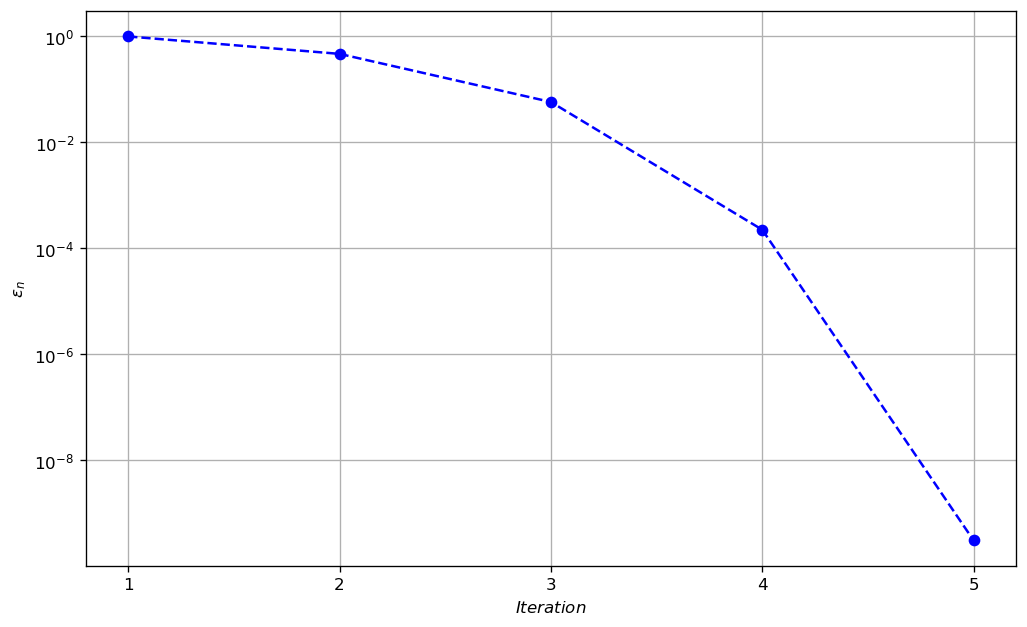

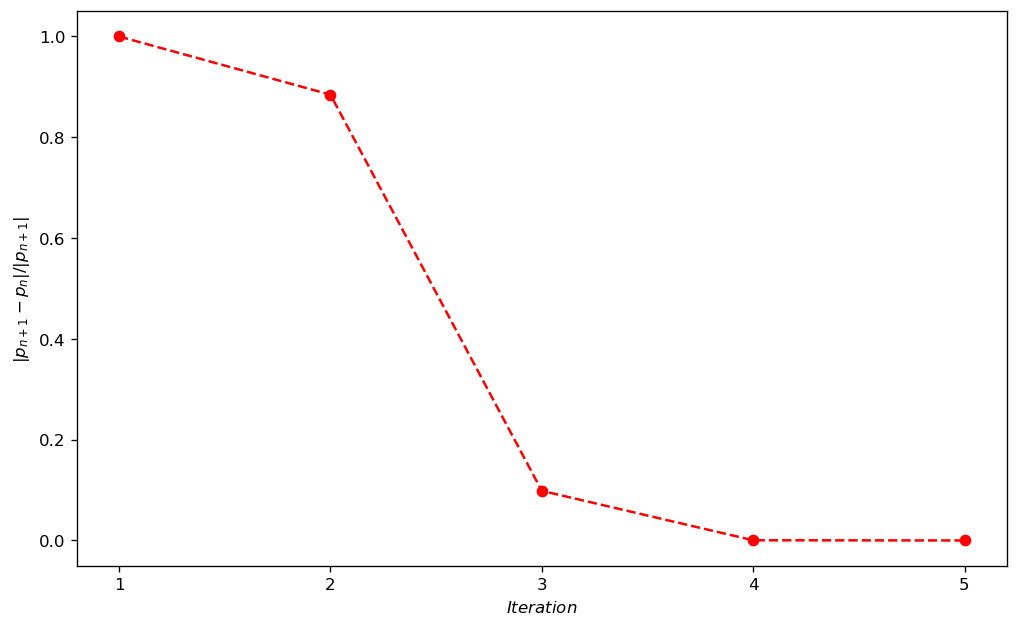



Part (b)



$f(x): $ $ \left(x + e^{- x^{2}} \cos{\left(x \right)}\right)^{2}$

No. of Iterations:  19
Relative Tolerance:  5.66145289942856e-7
Final Value of p:  -0.588401443380482
Final Value of f(p):  4.82427157114461e-13
Order of Convergence:  0.9999999820894209




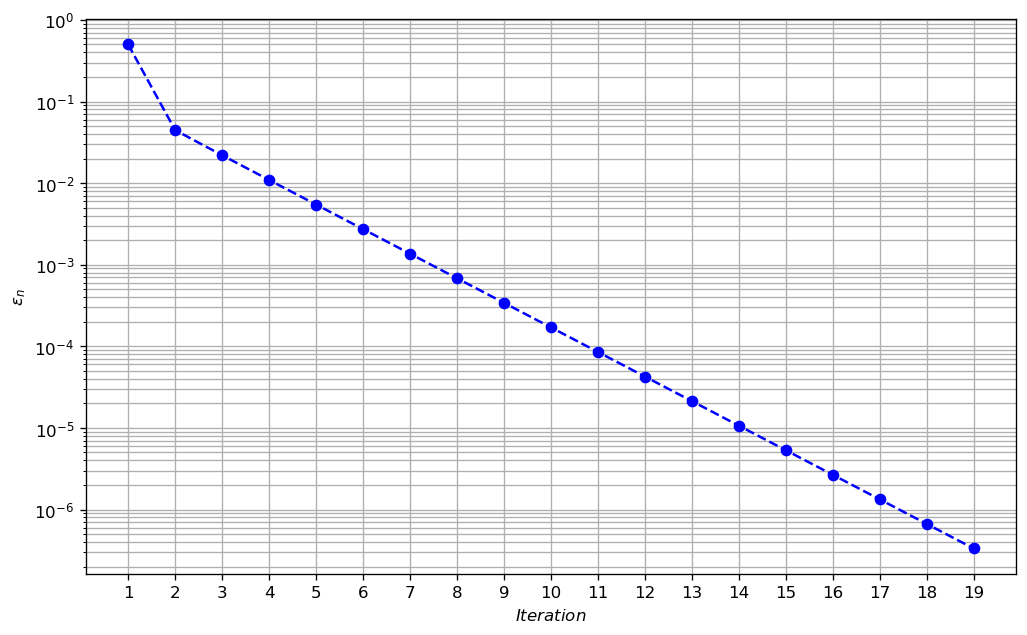

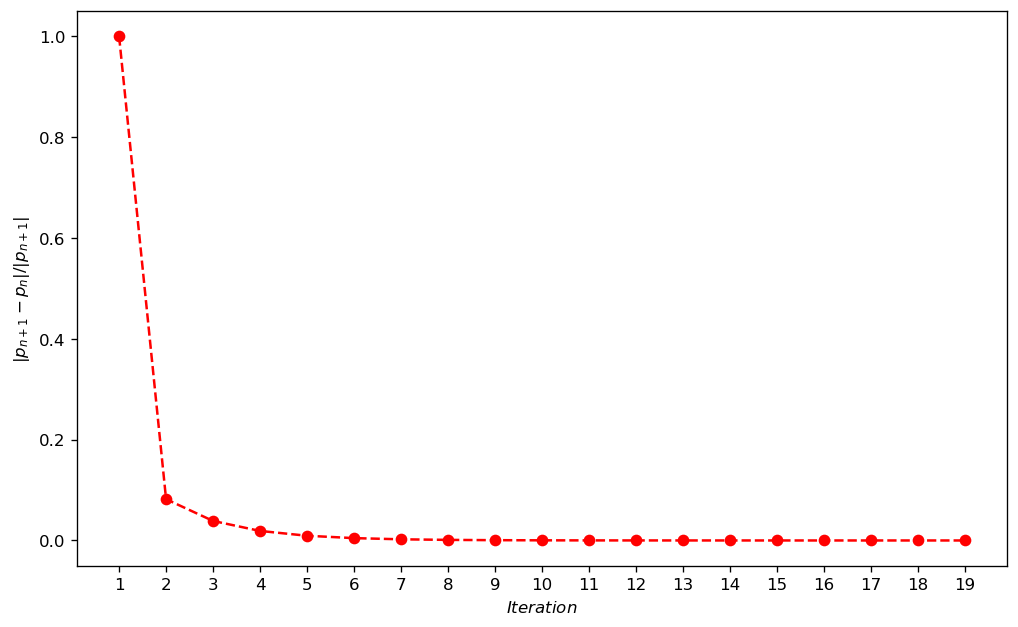

In [22]:
########################################################################
p = [0]
tol = 1e-6
iter = 0
epsilon = []
while True:
    p_new = p[iter] - (f1(x).subs(x,p[iter])/f1p(x).subs(x,p[iter]))
    p_new = sym.N(p_new)
    p.append(p_new)
    epsilon.append(abs(p[iter+1]-p[iter]))
    if abs((p[iter+1]-p[iter])/p[iter+1])<=tol:
        iter = iter+1
        break
    iter = iter+1

def find_order(epsilon):
    order = []
    for i in range(1,len(epsilon)-1):
        order.append(math.log(epsilon[i+1]/epsilon[i])/math.log(epsilon[i]/epsilon[i-1]))
    return order
order = find_order(epsilon)

print("\nPart (a)\n")
display(Markdown(f"$f(x): $ $ {f1_latex}$"))
print("No. of Iterations: ", iter)
print("Relative Tolerance: ", abs((p[iter]-p[iter-1])/p[iter-1]))
print("Final Value of p: ", p[iter])
print("Final Value of f(p): ", f1(x).subs(x,p[iter]))
print("Order of Convergence: ", order[len(order)-1])
print("\n")

plt.figure(figsize=(10, 6), dpi=120)
#plt.plot(range(2, len(order) + 2), order,'bo--')
# plt.plot(range(1, len(epsilon) + 1), epsilon, 'bo--')
# plt.grid(True, which="both", ls="-")
# plt.yscale("log")
# plt.xlabel(r"$n$")
# plt.ylabel(r"$Order$")

plt.plot(range(1, len(epsilon) + 1), epsilon, 'bo--')
plt.grid(True, which="both", ls="-")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlabel(r"$Iteration$")
plt.ylabel(r"$\epsilon_n$")
plt.yscale("log")

plt.savefig('LogNewton1Order.png')
plt.show()

relerr = []
for i in range(len(epsilon)):
    relerr.append(epsilon[i]/abs(p[i+1]))
plt.figure(figsize=(10, 6), dpi=120)
plt.plot(range(1, len(relerr) + 1), relerr,'ro--')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlabel(r"$Iteration$")
plt.ylabel(r"$|p_{n+1}-p_n|/|p_{n+1}|$")
#plt.savefig('Newton1Relative.png')
plt.show()

########################################################################
p = [0]
tol = 1e-6
iter = 0
epsilon = []
while True:
    p_new = p[iter] - (f2(x).subs(x,p[iter])/f2p(x).subs(x,p[iter]))
    p_new = sym.N(p_new)
    p.append(p_new)
    epsilon.append(abs(p[iter+1]-p[iter]))
    if abs((p[iter+1]-p[iter])/p[iter+1])<=tol:
        iter = iter+1
        break
    iter = iter+1

def find_order(epsilon):
    order = []
    for i in range(1,len(epsilon)-1):
        order.append(math.log(epsilon[i+1]/epsilon[i])/math.log(epsilon[i]/epsilon[i-1]))
    return order
order = find_order(epsilon)

print("\n\nPart (b)\n")
display(Markdown(f"$f(x): $ $ {f2_latex}$"))
print("No. of Iterations: ", iter)
print("Relative Tolerance: ", abs((p[iter]-p[iter-1])/p[iter-1]))
print("Final Value of p: ", p[iter])
print("Final Value of f(p): ", f2(x).subs(x,p[iter]))
print("Order of Convergence: ", order[len(order)-1])
print("\n")

plt.figure(figsize=(10, 6), dpi=120)
#plt.plot(range(2, len(order) + 2), order,'bo--')
#plt.loglog(epsilon[:],epsilon[:],'bo--')
#plt.grid(True, which="both", ls="-")
#plt.xlabel(r"$n$")
#plt.ylabel(r"$Order$")

plt.plot(range(1, len(epsilon) + 1), epsilon, 'bo--')
plt.grid(True, which="both", ls="-")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.yscale("log")
plt.xlabel(r"$Iteration$")
plt.ylabel(r"$\epsilon_n$")
#plt.savefig('LogNewton2Order.png')
plt.show()

relerr = []
for i in range(len(epsilon)):
    relerr.append(epsilon[i]/abs(p[i+1]))
plt.figure(figsize=(10, 6), dpi=120)
plt.plot(range(1, len(relerr) + 1), relerr,'ro--')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlabel(r"$Iteration$")
plt.ylabel(r"$|p_{n+1}-p_n|/|p_{n+1}|$")
#plt.savefig('Newton2Relative.png')
plt.show()


## Secant Method


Part (a)



$f(x): $ $ x + e^{- x^{2}} \cos{\left(x \right)}$

No. of Iterations:  8
Relative Tolerance:  8.50150762073084e-8
Final Value of p:  -0.588401776500901
Final Value of f(p):  1.98063787593128e-13
Order of Convergence:  2.3296554236837026




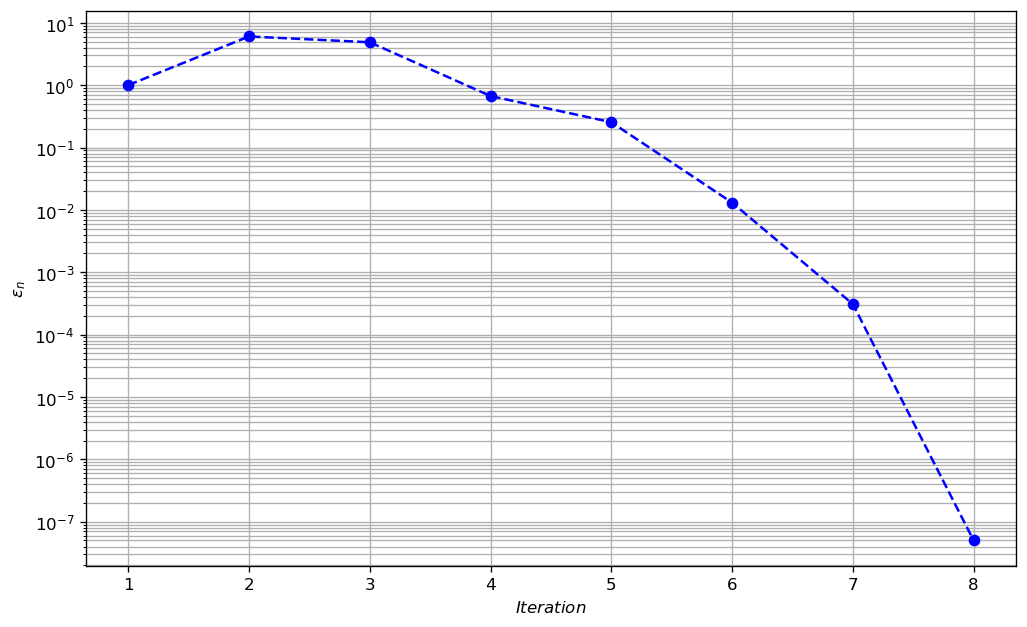

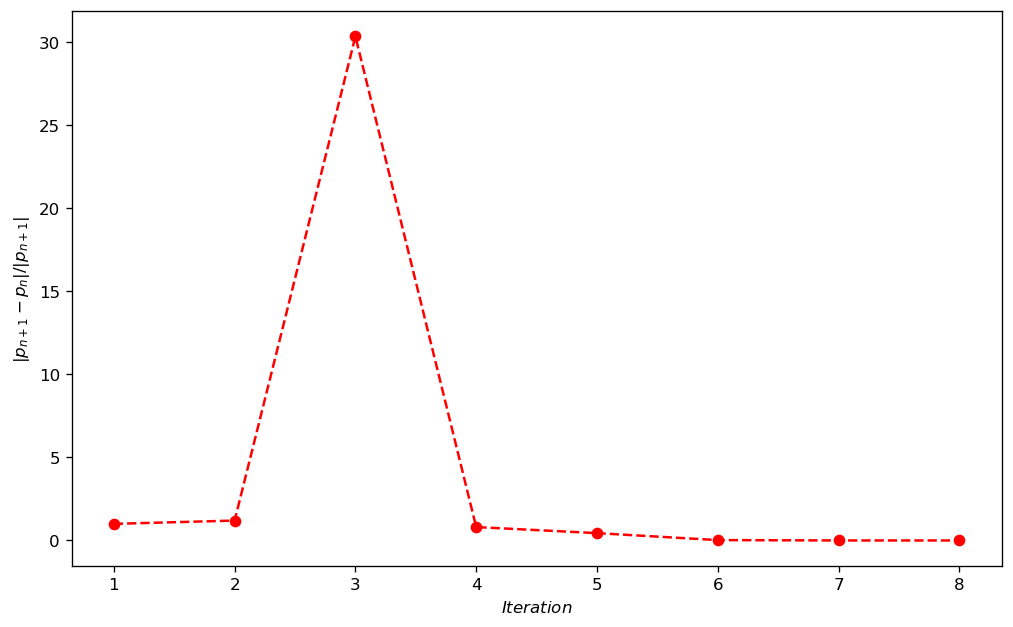



Part (b)



$f(x): $ $ \left(x + e^{- x^{2}} \cos{\left(x \right)}\right)^{2}$

No. of Iterations:  35
Relative Tolerance:  7.12723991679115e-7
Final Value of p:  -0.588401097950494
Final Value of f(p):  2.00167397132503e-12
Order of Convergence:  0.9999999388622839




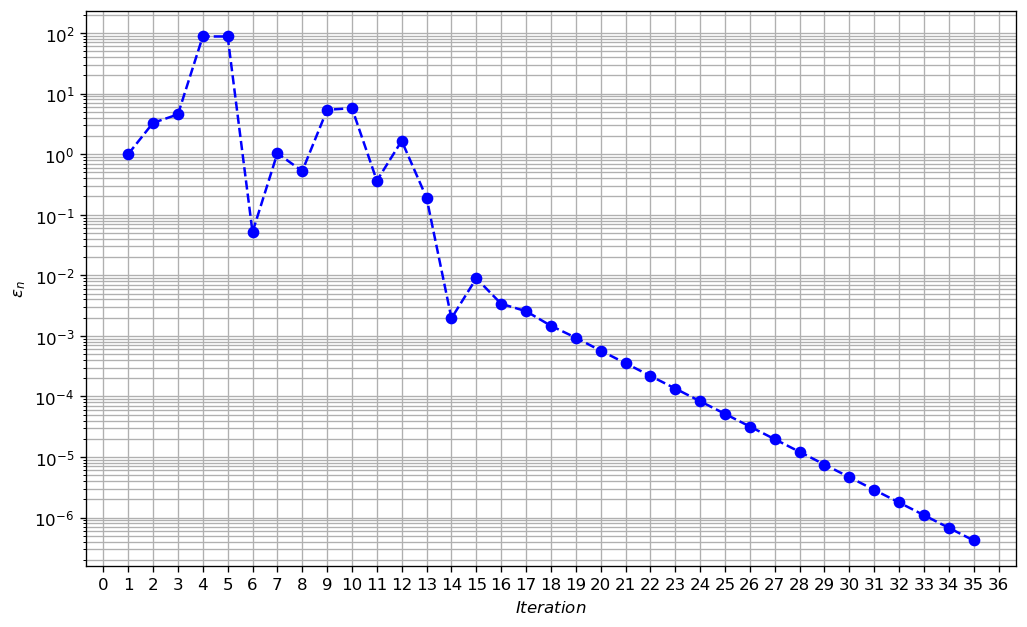

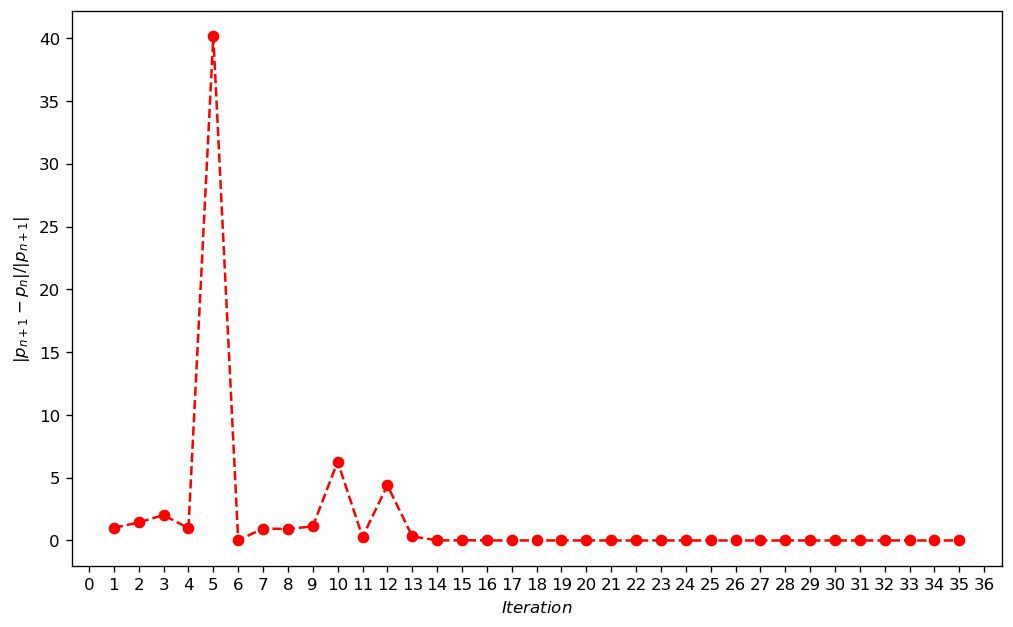

In [46]:
########################################################################
p = [0,1]
tol = 1e-6
iter = 1
epsilon = [1]

def f1val(num):
    return f1(x).subs(x,num)

while True:
    p_new = p[iter] - ((f1val(p[iter])*(p[iter] - p[iter-1]))/(f1val(p[iter]) - f1val(p[iter-1])))
    p_new = sym.N(p_new)
    p.append(p_new)
    epsilon.append(abs(p[iter+1]-p[iter]))
    if abs((p[iter+1]-p[iter])/p[iter+1])<=tol:
        iter = iter+1
        break
    iter = iter+1

def find_order(epsilon):
    order = []
    for i in range(1,len(epsilon)-1):
        order.append(math.log(epsilon[i+1]/epsilon[i])/math.log(epsilon[i]/epsilon[i-1]))
    return order
order = find_order(epsilon)

print("\nPart (a)\n")
display(Markdown(f"$f(x): $ $ {f1_latex}$"))
print("No. of Iterations: ", iter)
print("Relative Tolerance: ", abs((p[iter]-p[iter-1])/p[iter-1]))
print("Final Value of p: ", p[iter])
print("Final Value of f(p): ", f1(x).subs(x,p[iter]))
print("Order of Convergence: ", order[len(order)-1])
print("\n")

plt.figure(figsize=(10, 6), dpi=120)
#plt.plot(range(2, len(order) + 2), order,'bo--')
#plt.loglog(epsilon[:],epsilon[:],'bo--')
#plt.grid(True, which="both", ls="-")
#plt.xlabel(r"$n$")
#plt.ylabel(r"$Order$")
#plt.savefig('Secant1Order.png')

plt.plot(range(1, len(epsilon) + 1), epsilon, 'bo--')
plt.grid(True, which="both", ls="-")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.yscale("log")
plt.xlabel(r"$Iteration$")
plt.ylabel(r"$\epsilon_n$")
plt.savefig('LogSecant1Order.png')
plt.show()

relerr = []
for i in range(len(epsilon)):
    relerr.append(epsilon[i]/abs(p[i+1]))
plt.figure(figsize=(10, 6), dpi=120)
plt.plot(range(1, len(relerr) + 1), relerr,'ro--')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlabel(r"$Iteration$")
plt.ylabel(r"$|p_{n+1}-p_n|/|p_{n+1}|$")
plt.savefig('Secant1Relative.png')
plt.show()

########################################################################
p = [0,1]
tol = 1e-6
iter = 1
epsilon = [1]

def f2val(num):
    return f2(x).subs(x,num)

while True:
    p_new = p[iter] - ((f2val(p[iter])*(p[iter] - p[iter-1]))/(f2val(p[iter]) - f2val(p[iter-1])))
    p_new = sym.N(p_new)
    p.append(p_new)
    epsilon.append(abs(p[iter+1]-p[iter]))
    if abs((p[iter+1]-p[iter])/p[iter+1])<=tol:
        iter = iter+1
        break
    iter = iter+1

def find_order(epsilon):
    order = []
    for i in range(1,len(epsilon)-1):
        order.append(math.log(epsilon[i+1]/epsilon[i])/math.log(epsilon[i]/epsilon[i-1]))
    return order
order = find_order(epsilon)

print("\n\nPart (b)\n")
display(Markdown(f"$f(x): $ $ {f2_latex}$"))
print("No. of Iterations: ", iter)
print("Relative Tolerance: ", abs((p[iter]-p[iter-1])/p[iter-1]))
print("Final Value of p: ", p[iter])
print("Final Value of f(p): ", f2(x).subs(x,p[iter]))
print("Order of Convergence: ", order[len(order)-1])
print("\n")

plt.figure(figsize=(10, 6), dpi=120)
#plt.plot(range(2, len(order) + 2), order,'bo--')
#plt.loglog(epsilon[:],epsilon[:],'bo--')
#plt.grid(True, which="both", ls="-")
#plt.xlabel(r"$n$")
#plt.ylabel(r"$Order$")
#plt.savefig('Secant2Order.png')

plt.plot(range(1, len(epsilon) + 1), epsilon, 'bo--')
plt.grid(True, which="both", ls="-")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.yscale("log")
plt.xlabel(r"$Iteration$")
plt.ylabel(r"$\epsilon_n$")
plt.savefig('LogSecant2Order.png')
plt.show()

relerr = []
for i in range(len(epsilon)):
    relerr.append(epsilon[i]/abs(p[i+1]))
plt.figure(figsize=(10, 6), dpi=120)
plt.plot(range(1, len(relerr) + 1), relerr,'ro--')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlabel(r"$Iteration$")
plt.ylabel(r"$|p_{n+1}-p_n|/|p_{n+1}|$")
plt.savefig('Secant2Relative.png')
plt.show()


## Modified Newton Method


Part (a)



$f(x): $ $ x + e^{- x^{2}} \cos{\left(x \right)}$

No. of Iterations:  5
Relative Tolerance:  2.28753315742628e-8
Final Value of p:  -0.588401776500996
Final Value of f(p):  -1.11022302462516e-16
Order of Convergence:  2.7322000706575094




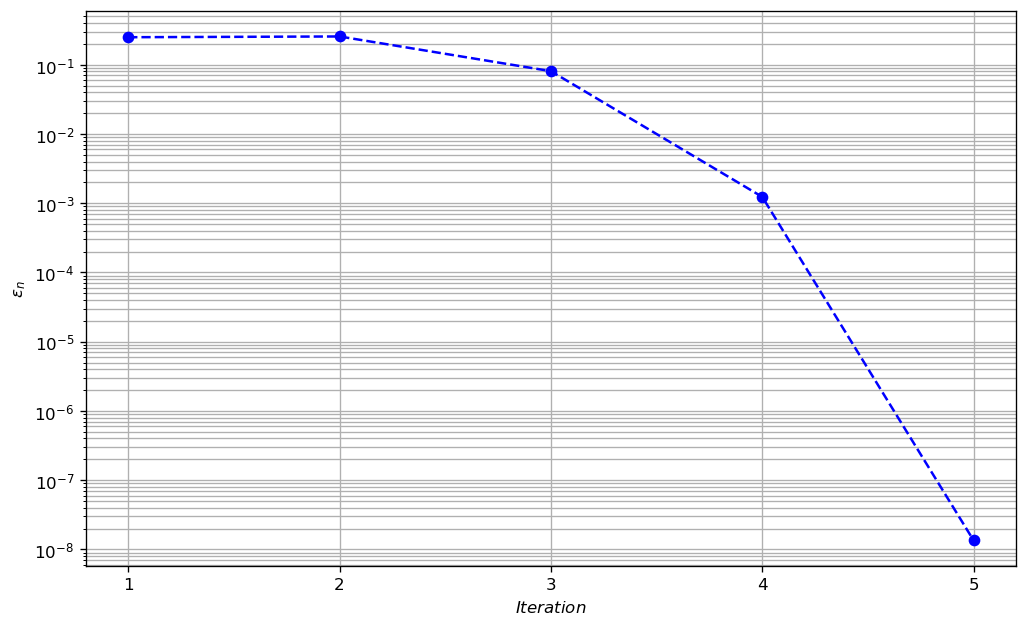

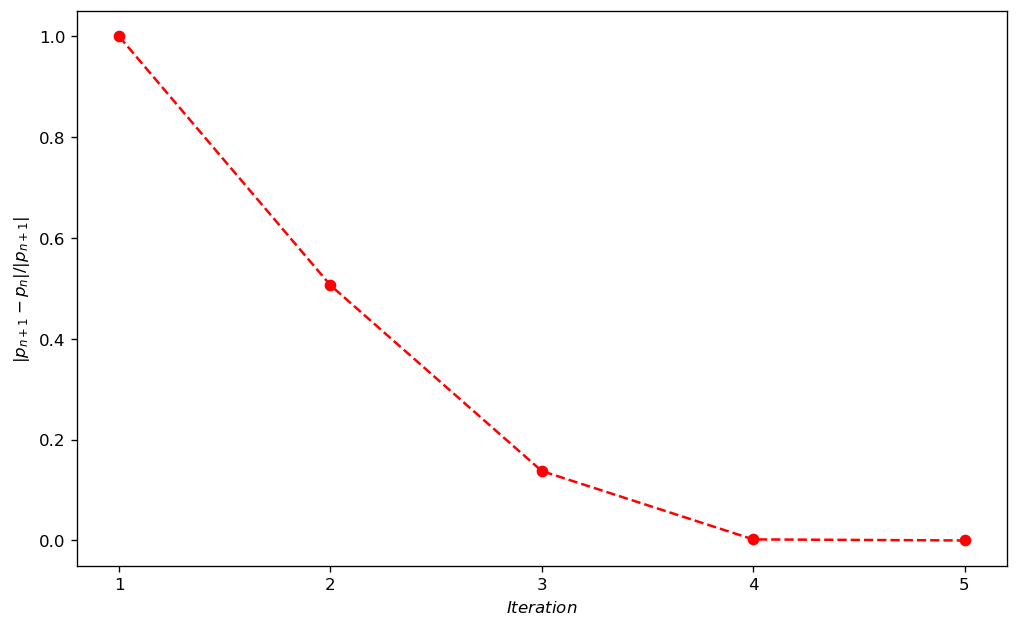



Part (b)



$f(x): $ $ \left(x + e^{- x^{2}} \cos{\left(x \right)}\right)^{2}$

No. of Iterations:  5
Relative Tolerance:  2.28753315742628e-8
Final Value of p:  -0.588401776500996
Final Value of f(p):  1.23259516440783e-32
Order of Convergence:  2.7322000706575085




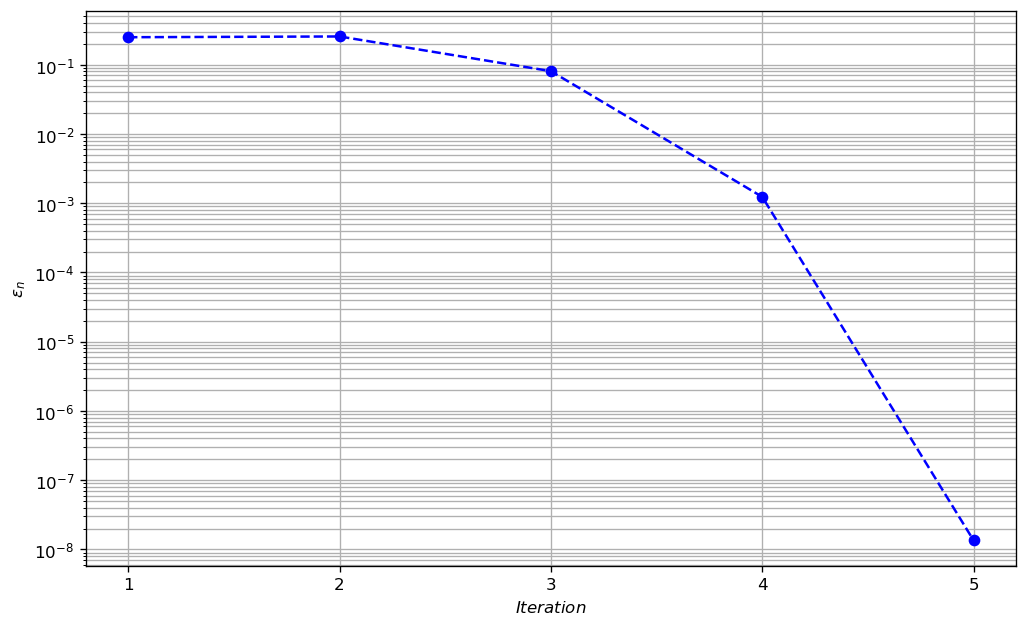

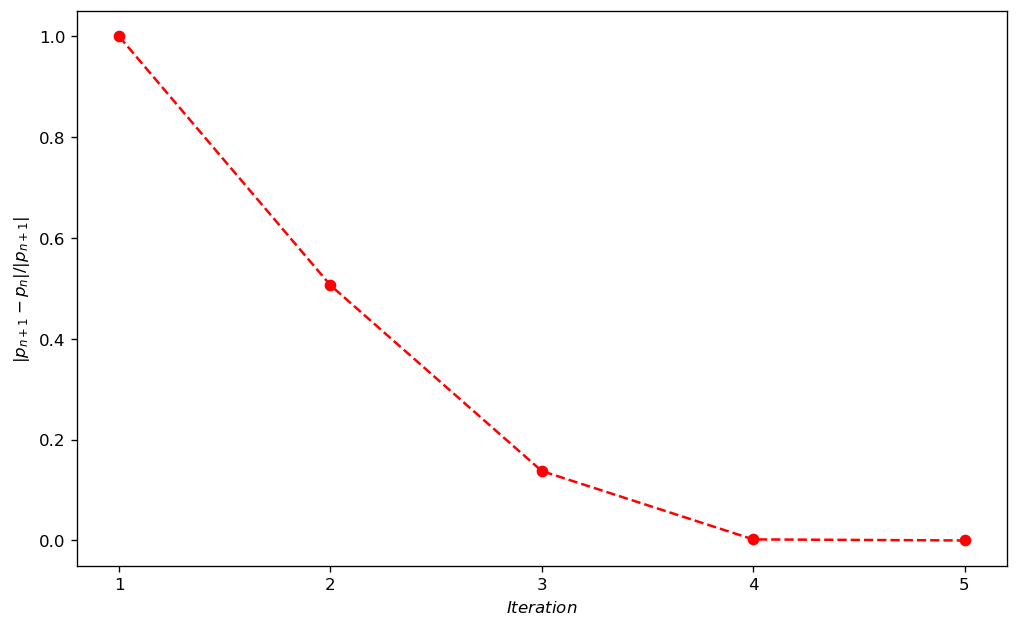

In [82]:
########################################################################
p = [0]
tol = 1e-6
iter = 0
epsilon = []

def f1val(num):
    return f1(x).subs(x,num)
def f1pval(num):
    return f1p(x).subs(x,num)
def f1ppval(num):
    return f1pp(x).subs(x,num)

while True:
    p_new = p[iter] - ((f1val(p[iter])*f1pval(p[iter]))/(f1pval(p[iter])*f1pval(p[iter]) - f1val(p[iter])*f1ppval(p[iter])))
    p_new = sym.N(p_new)
    p.append(p_new)
    epsilon.append(abs(p[iter+1]-p[iter]))
    if abs((p[iter+1]-p[iter])/p[iter])<=tol:
        iter = iter+1
        break
    iter = iter+1

def find_order(epsilon):
    order = []
    for i in range(1,len(epsilon)-1):
        order.append(math.log(epsilon[i+1]/epsilon[i])/math.log(epsilon[i]/epsilon[i-1]))
    return order
order = find_order(epsilon)

print("\nPart (a)\n")
display(Markdown(f"$f(x): $ $ {f1_latex}$"))
print("No. of Iterations: ", iter)
print("Relative Tolerance: ", abs((p[iter]-p[iter-1])/p[iter-1]))
print("Final Value of p: ", p[iter])
print("Final Value of f(p): ", f1(x).subs(x,p[iter]))
print("Order of Convergence: ", order[len(order)-1])
print("\n")

plt.figure(figsize=(10, 6), dpi=120)
# plt.plot(range(2, len(order) + 2), order,'bo--')
# plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
# plt.xlabel(r"$n$")
# plt.ylabel(r"$Order$")

plt.plot(range(1, len(epsilon) + 1), epsilon, 'bo--')
plt.grid(True, which="both", ls="-")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.yscale("log")
plt.xlabel(r"$Iteration$")
plt.ylabel(r"$\epsilon_n$")
plt.savefig('LogModNewton1Order.png')
plt.show()

relerr = []
for i in range(len(epsilon)):
    relerr.append(epsilon[i]/abs(p[i+1]))
plt.figure(figsize=(10, 6), dpi=120)
plt.plot(range(1, len(relerr) + 1), relerr,'ro--')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlabel(r"$Iteration$")
plt.ylabel(r"$|p_{n+1}-p_n|/|p_{n+1}|$")
#plt.savefig('ModNewton1Relative.png')
plt.show()

########################################################################
p = [0]
tol = 1e-6
iter = 0
epsilon = []

def f2val(num):
    return f2(x).subs(x,num)
def f2pval(num):
    return f2p(x).subs(x,num)
def f2ppval(num):
    return f2pp(x).subs(x,num)

while True:
    p_new = p[iter] - ((f2val(p[iter])*f2pval(p[iter]))/(f2pval(p[iter])*f2pval(p[iter]) - f2val(p[iter])*f2ppval(p[iter])))
    p_new = sym.N(p_new)
    p.append(p_new)
    epsilon.append(abs(p[iter+1]-p[iter]))
    if abs((p[iter+1]-p[iter])/p[iter])<=tol:
        iter = iter+1
        break
    iter = iter+1

def find_order(epsilon):
    order = []
    for i in range(1,len(epsilon)-1):
        order.append(math.log(epsilon[i+1]/epsilon[i])/math.log(epsilon[i]/epsilon[i-1]))
    return order
order = find_order(epsilon)

print("\n\nPart (b)\n")
display(Markdown(f"$f(x): $ $ {f2_latex}$"))
print("No. of Iterations: ", iter)
print("Relative Tolerance: ", abs((p[iter]-p[iter-1])/p[iter-1]))
print("Final Value of p: ", p[iter])
print("Final Value of f(p): ", f2(x).subs(x,p[iter]))
print("Order of Convergence: ", order[len(order)-1])
print("\n")

plt.figure(figsize=(10, 6), dpi=120)
# plt.plot(range(2, len(order) + 2), order,'bo--')
# plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
# plt.xlabel(r"$n$")
# plt.ylabel(r"$Order$")

plt.plot(range(1, len(epsilon) + 1), epsilon, 'bo--')
plt.grid(True, which="both", ls="-")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.yscale("log")
plt.xlabel(r"$Iteration$")
plt.ylabel(r"$\epsilon_n$")
plt.savefig('LogModNewton2Order.png')
plt.show()

relerr = []
for i in range(len(epsilon)):
    relerr.append(epsilon[i]/abs(p[i+1]))
plt.figure(figsize=(10, 6), dpi=120)
plt.plot(range(1, len(relerr) + 1), relerr,'ro--')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlabel(r"$Iteration$")
plt.ylabel(r"$|p_{n+1}-p_n|/|p_{n+1}|$")
#plt.savefig('ModNewton2Relative.png')
plt.show()


## Ques 3

In [2]:
########################################################################
import sympy as sym
import math
from IPython.display import display, Math, Markdown
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

theta2, theta3 = sym.symbols('theta2 theta3')

########################################################################
def f1(theta2, theta3):
    return 6*sym.cos(theta2) + 8*sym.cos(theta3) + 4*math.cos(220*(math.pi/180)) - 10
def f1theta2(theta2, theta3):
    return sym.diff(f1(theta2,theta3),theta2)
def f1theta3(theta2, theta3):
    return sym.diff(f1(theta2,theta3),theta3)
    
########################################################################
def f2(theta2, theta3):
    return 6*sym.sin(theta2) + 8*sym.sin(theta3) + 4*math.sin(220*(math.pi/180))
def f2theta2(theta2, theta3):
    return sym.diff(f2(theta2,theta3),theta2)
def f2theta3(theta2, theta3):
    return sym.diff(f2(theta2,theta3),theta3)

########################################################################
def j(theta2, theta3):
    return sym.Matrix([[f1theta2(theta2, theta3), f1theta3(theta2, theta3)],[f2theta2(theta2, theta3), f2theta3(theta2, theta3)]])

########################################################################
def f(theta2, theta3):
    return sym.Matrix([[f1(theta2, theta3)],[f2(theta2, theta3)]])
    
def jinv(theta2, theta3):
    return sym.simplify(j(theta2, theta3).inv())

########################################################################
f_latex = sym.latex(f(theta2, theta3))
jinv_latex = sym.latex(jinv(theta2, theta3))

########################################################################
def display_latex(label, latex_expr):
    display(Markdown(f"${label}$ $ {latex_expr}$"))

print("\n")
display(Markdown(r"$f(\theta_2, \theta_3):  $"  f"$ {f_latex}$"))
print("\n")
display(Markdown(r"$J^{-1}(\theta_2, \theta_3):  $"  f"$ {jinv_latex}$"))
print("\n")


$f(\theta_2, \theta_3):  $$ \left[\begin{matrix}6 \cos{\left(\theta_{2} \right)} + 8 \cos{\left(\theta_{3} \right)} - 13.0641777724759\\6 \sin{\left(\theta_{2} \right)} + 8 \sin{\left(\theta_{3} \right)} - 2.57115043874616\end{matrix}\right]$

$J^{-1}(\theta_2, \theta_3):  $$ \left[\begin{matrix}- \frac{\cos{\left(\theta_{3} \right)}}{6 \sin{\left(\theta_{2} - \theta_{3} \right)}} & - \frac{\sin{\left(\theta_{3} \right)}}{6 \sin{\left(\theta_{2} - \theta_{3} \right)}}\\\frac{\cos{\left(\theta_{2} \right)}}{8 \sin{\left(\theta_{2} - \theta_{3} \right)}} & \frac{\sin{\left(\theta_{2} \right)}}{8 \sin{\left(\theta_{2} - \theta_{3} \right)}}\end{matrix}\right]$

## Newton Method for System of Equations

$f(\theta_2, \theta_3):  $$ \left[\begin{matrix}6 \cos{\left(\theta_{2} \right)} + 8 \cos{\left(\theta_{3} \right)} - 13.0641777724759\\6 \sin{\left(\theta_{2} \right)} + 8 \sin{\left(\theta_{3} \right)} - 2.57115043874616\end{matrix}\right]$



No. of Iterations:  4
Max. Relative Tolerance:  1.11372373822926e-7
Final Value of p (in radian):  [0.558770307890069, -0.0762881217804664]
Final Value of p (in degrees):  [32.0151803593265, 355.629012594999]
Final Value of f(p):  [0, -4.44089209850063e-16]




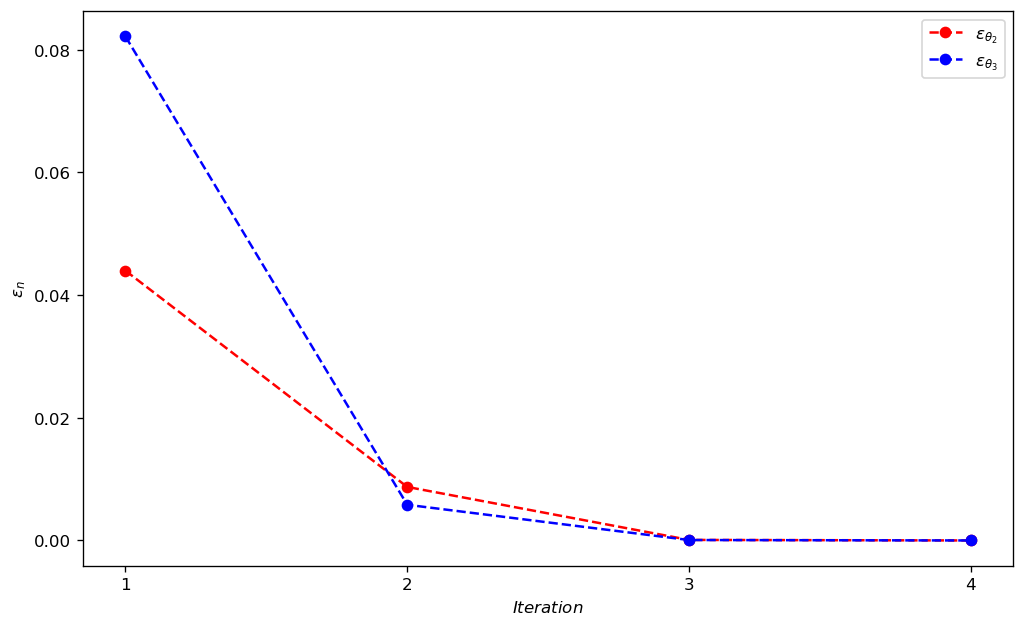

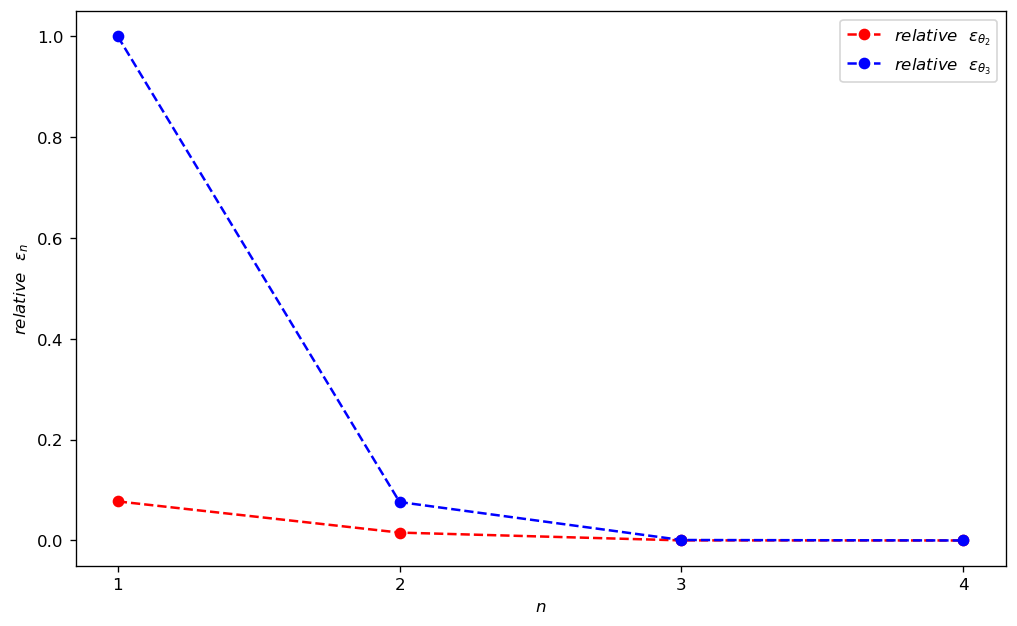

In [6]:
def rad(theta):
    return theta*(math.pi/180)

def deg(theta):
    val = theta*(180/math.pi)
    if val>=0:
        return val
    else:
        return 360+val

def maxval(theta, i):
    val1 = abs(theta[i+1][0] - theta[i][0])
    val2 = abs(theta[i+1][1] - theta[i][1])
    return [val1, val2]
    
def maxrel(theta, i):
    val1 = abs((theta[i+1][0] - theta[i][0])/theta[i+1][0])
    val2 = abs((theta[i+1][1] - theta[i][1])/theta[i+1][1])
    return [val1, val2]

theta = [[rad(30), rad(0)]]
tol = 1e-4
iter = 0
epsilon = []
relative = []
while True:
    p_new = ((jinv(theta2,theta3).subs([(theta2,theta[iter][0]),(theta3,theta[iter][1])]))*(f(theta2,theta3).subs([(theta2,theta[iter][0]),(theta3,theta[iter][1])]))).T
    p_new_flat = [item for sublist in p_new.tolist() for item in sublist]
    theta_iter_flat = theta[iter]
    theta_new = [theta_iter_flat[i] - p_new_flat[i] for i in range(len(p_new_flat))]
    theta.append(theta_new)
    abserrval = maxval(theta,iter)
    relerrval = maxrel(theta,iter)
    epsilon.append(abserrval)
    relative.append(relerrval)
    if max(relerrval)<=tol:
        iter = iter+1
        break
    iter = iter+1

print("\n")
display(Markdown(r"$f(\theta_2, \theta_3):  $"  f"$ {f_latex}$"))
print("\n")
print("No. of Iterations: ", iter)
print("Max. Relative Tolerance: ", max(maxrel(theta,iter-1)))
print("Final Value of p (in radian): ", theta[iter])
print("Final Value of p (in degrees): ", [deg(theta[iter][i]) for i in range(2)])
print("Final Value of f(p): ", f(theta2,theta3).subs([(theta2,theta[iter][0]),(theta3,theta[iter][1])]).T.tolist()[0])
print("\n")

theta2err = [epsilon[i][0] for i in range(iter)]
theta3err = [epsilon[i][1] for i in range(iter)]

plt.figure(figsize=(10, 6), dpi=120)
plt.plot(range(1, len(theta2err) + 1), theta2err,'ro--', label = r"$\epsilon_{\theta_2}$")
plt.plot(range(1, len(theta3err) + 1), theta3err,'bo--', label = r"$\epsilon_{\theta_3}$")
plt.legend()
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlabel(r"$Iteration$")
plt.ylabel(r"$\epsilon_{n}$")
plt.savefig('CoupleNewton.png')
plt.show()

theta2rel = [relative[i][0] for i in range(iter)]
theta3rel = [relative[i][1] for i in range(iter)]

plt.figure(figsize=(10, 6), dpi=120)
plt.plot(range(1, len(theta2rel) + 1), theta2rel,'ro--', label = r"$relative~~\epsilon_{\theta_2}$")
plt.plot(range(1, len(theta3rel) + 1), theta3rel,'bo--', label = r"$relative~~\epsilon_{\theta_3}$")
plt.legend()
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlabel(r"$n$")
plt.ylabel(r"$relative~~\epsilon_{n}$")
plt.savefig('RelativeCoupleNewton.png')
plt.show()


In [132]:
import sympy as sp

# Symbols
theta2, theta3 = sp.symbols('theta2 theta3')

# Constants
r1, r2, r3, r4 = 10, 6, 8, 4
theta4 = sp.rad(220)
tol = 1e-4
max_iterations = 10

# Nonlinear equations
f1 = r2 * sp.cos(theta2) + r3 * sp.cos(theta3) + r4 * sp.cos(theta4) - r1
f2 = r2 * sp.sin(theta2) + r3 * sp.sin(theta3) + r4 * sp.sin(theta4)

# Initial Guesses
theta2_val = sp.rad(30)
theta3_val = sp.rad(0) 

# Jacobian
J = sp.Matrix([[sp.diff(f1, theta2), sp.diff(f1, theta3)],
               [sp.diff(f2, theta2), sp.diff(f2, theta3)]])

delta_theta = J.inv() * -sp.Matrix([[f1], [f2]])

iteration_counter = 0
theta_values = [(float(theta2_val), float(theta3_val))]
errors = []
relerr = []
while iteration_counter < max_iterations:
    
    delta_thetax = delta_theta.subs({theta2: theta2_val, theta3: theta3_val})
    theta2_val += delta_thetax[0]
    theta2_val = float(theta2_val)
    theta3_val += delta_thetax[1]
    theta3_val = float(theta3_val)
    errors.append((float(abs(delta_thetax[0])), float(abs(delta_thetax[1]))))
        
    theta_values.append((theta2_val, theta3_val))
    
    iteration_counter += 1

    relerr.append((abs(float(delta_thetax[0])/float(theta2_val)), abs(float(delta_thetax[1])/float(theta3_val))))
    
    # Check for convergence
    if relerr[-1][0] < tol and relerr[-1][1] < tol:
        print(f'Converged in {iteration_counter} iterations')
        break
    
else:
    print('Did not converge within the maximum number of iterations')

print(errors)
print(relerr)

Converged in 4 iterations
[(0.04399155007690658, 0.08217954509557261), (0.008730467283212034, 0.005820331692770972), (8.953938385647492e-05, 7.108312594614885e-05), (1.1118067617249828e-08, 8.496389304487897e-09)]
[(0.07750581376554336, 1.0), (0.0156219258766092, 0.07622304412786718), (0.00016024362928835354, 0.0009317717669601122), (1.989738441763653e-08, 1.113723749673364e-07)]
